### 19MID0023 Saksham Verma
### Question
Implement Support Vector Machine Algorithm for Multi-class classification (both one versus all, one versus one) using iris.csv dataset with different kernels. The output should include Accuracy, Error rate, Precision and recall rate along with the confusion matrix. 

### Importing libraries

In [28]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Loading dataset

In [4]:
dataset_Iris = pd.read_csv("Iris.csv")

In [6]:
dataset_Iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
dataset_Iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## Exploratory Data Analysis (EDA)

### Knowing shape

In [16]:
dataset_Iris.shape

(150, 5)

### knowing names of columns

In [24]:
dataset_Iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

### knowing Non-Null Count  and Dtype

In [25]:
dataset_Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [26]:
dataset_Iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Finding unique values and there respective counts

In [20]:
dataset_Iris["species"].unique()

array([0, 1, 2], dtype=int64)

In [22]:
dataset_Iris['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

* As the shape/ number of rows are comparable hence the dataset is not baised

### Preprocessing the datasets

In [23]:
# check for null values
dataset_Iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [10]:
dataset_Iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

### Data Visualisation

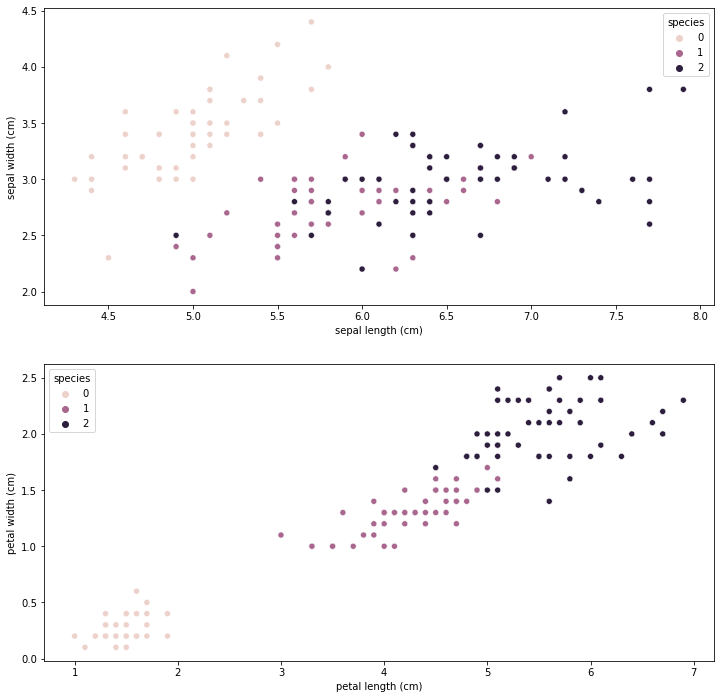

In [31]:
# Scatter Plot
z = dataset_Iris.columns[:-1].values
fig,ax = plt.subplots(nrows=2,figsize=(12,12))
for i in range(2) :
 sns.scatterplot(x=z[2*i],y=z[2*i+1],hue='species',data=dataset_Iris,ax=ax[i])

<AxesSubplot:>

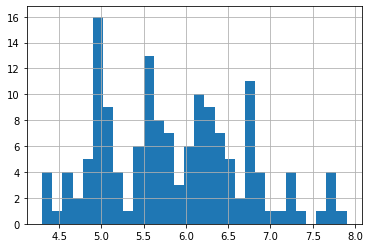

In [34]:
dataset_Iris['sepal length (cm)'].hist(bins=30)

<AxesSubplot:>

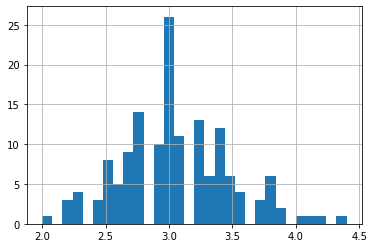

In [41]:
dataset_Iris['sepal width (cm)'].hist(bins=30)

<AxesSubplot:>

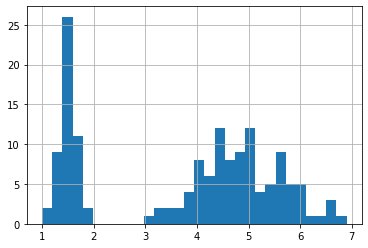

In [42]:
dataset_Iris['petal length (cm)'].hist(bins=30)

<AxesSubplot:>

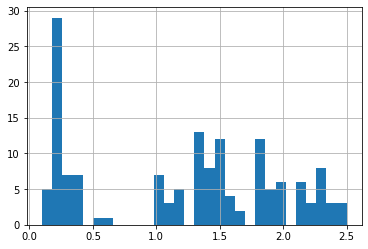

In [45]:
dataset_Iris['petal width (cm)'].hist(bins=30)

### Splitting data for train and test

In [36]:
X = dataset_Iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y = dataset_Iris.species

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 1)

### Training models wrt multiple kernels

In [80]:
Linear_kernel = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
RBF_kernel = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
Polynomial_kernel = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
Sigmoid_kernel = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

Linear_kernel_r = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr').fit(X_train, y_train)
RBF_kernel_r = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovr').fit(X_train, y_train)
Polynomial_kernel_r = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovr').fit(X_train, y_train)
Sigmoid_kernel_r = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovr').fit(X_train, y_train)

In [74]:
#stepsize in the mesh, it alters the accuracy of the plotprint
h = .01
#create the mesh
x_min, x_max = X["sepal length (cm)"].min() - 1, X["sepal length (cm)"].max() + 1
y_min, y_max = X["sepal width (cm)"].min() - 1, X["sepal width (cm)"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

In [75]:
linear_pred = Linear_kernel.predict(X_test)
poly_pred = Polynomial_kernel.predict(X_test)
rbf_pred = RBF_kernel.predict(X_test)
sig_pred = Sigmoid_kernel.predict(X_test)

In [81]:
linear_pred_r = Linear_kernel_r.predict(X_test)
poly_pred_r = Polynomial_kernel_r.predict(X_test)
rbf_pred_r = RBF_kernel_r.predict(X_test)
sig_pred_r = Sigmoid_kernel_r.predict(X_test)

In [82]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = Linear_kernel.score(X_test, y_test)
accuracy_poly = Polynomial_kernel.score(X_test, y_test)
accuracy_rbf = RBF_kernel.score(X_test, y_test)
accuracy_sig = Sigmoid_kernel.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 1.0
Accuracy Polynomial Kernel: 0.9666666666666667
Accuracy Radial Basis Kernel: 0.9666666666666667
Accuracy Sigmoid Kernel: 0.2


In [84]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = Linear_kernel_r.score(X_test, y_test)
accuracy_poly = Polynomial_kernel_r.score(X_test, y_test)
accuracy_rbf = RBF_kernel_r.score(X_test, y_test)
accuracy_sig = Sigmoid_kernel_r.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 1.0
Accuracy Polynomial Kernel: 0.9666666666666667
Accuracy Radial Basis Kernel: 0.9666666666666667
Accuracy Sigmoid Kernel: 0.2


In [77]:
# creating a confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)
print(cm_lin)
print(cm_poly)
print(cm_rbf)
print(cm_sig)


[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
[[ 0  0 11]
 [ 0  0 13]
 [ 0  0  6]]


In [83]:
print("Error rate Linear Kernel:", 1-accuracy_lin)
print("Error rate Polynomial Kernel:", 1-accuracy_poly)
print("Error rate Radial Basis Kernel:", 1-accuracy_rbf)
print("Error rate Sigmoid Kernel:", 1-accuracy_sig)

Error rate Linear Kernel: 0.0
Error rate Polynomial Kernel: 0.033333333333333326
Error rate Radial Basis Kernel: 0.033333333333333326
Error rate Sigmoid Kernel: 0.8


In [79]:
from sklearn.metrics import classification_report

clf_report = pd.DataFrame(classification_report(y_test, linear_pred, output_dict=True))

 
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, linear_pred)}\n")        

clf_report = pd.DataFrame(classification_report(y_test, poly_pred, output_dict=True))


print(f"CLASSIFICATION REPORT:\n{clf_report}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, poly_pred)}\n")        

clf_report = pd.DataFrame(classification_report(y_test, rbf_pred, output_dict=True))


print(f"CLASSIFICATION REPORT:\n{clf_report}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, rbf_pred)}\n")        

clf_report = pd.DataFrame(classification_report(y_test, sig_pred, output_dict=True))


print(f"CLASSIFICATION REPORT:\n{clf_report}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, sig_pred)}\n")        

CLASSIFICATION REPORT:
              0     1    2  accuracy  macro avg  weighted avg
precision   1.0   1.0  1.0       1.0        1.0           1.0
recall      1.0   1.0  1.0       1.0        1.0           1.0
f1-score    1.0   1.0  1.0       1.0        1.0           1.0
support    11.0  13.0  6.0       1.0       30.0          30.0
Confusion Matrix: 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

CLASSIFICATION REPORT:
              0          1         2  accuracy  macro avg  weighted avg
precision   1.0   1.000000  0.857143  0.966667   0.952381      0.971429
recall      1.0   0.923077  1.000000  0.966667   0.974359      0.966667
f1-score    1.0   0.960000  0.923077  0.966667   0.961026      0.967282
support    11.0  13.000000  6.000000  0.966667  30.000000     30.000000
Confusion Matrix: 
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

CLASSIFICATION REPORT:
              0          1         2  accuracy  macro avg  weighted avg
precision   1.0   1.000000  0.857143  0.966667   0.952381      0.971429
r

C:\Users\saksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
